# Analyzing a synthetized mrw

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
figure_folder = 'figures/fBm/'

## Generating a signal

Let's first generate a multifractal random walk with parameters H = 0.8, $\lambda$ = 0.3 and L = 4096

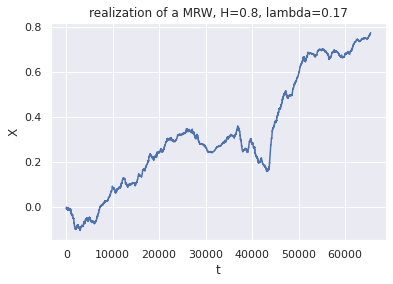

In [3]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=65536, H=0.8, lam=np.sqrt(0.03), L=65536)

plt.plot(X)
plt.title('realization of a MRW, H=0.8, lambda=0.17')
plt.ylabel('X')
plt.xlabel('t')
plt.show()

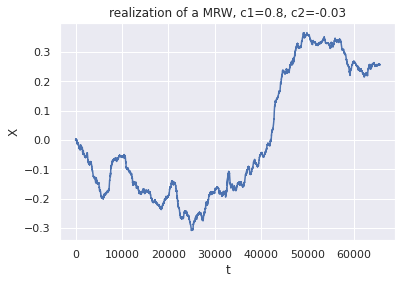

In [4]:
from pymultifracs.simul import mrw_cumul

X2 = mrw_cumul(shape=65536, c1=0.8, c2=-0.03, L=65536)

plt.plot(X2)
plt.title('realization of a MRW, c1=0.8, c2=-0.03')
plt.ylabel('X')
plt.xlabel('t')
plt.show()

## Power Spectral Density

Power spectral density analysis is done with the `psd` module

The sampling frequency `fs` is necessary in order to correctly label the frequency axis

In [5]:
import pymultifracs.psd as psd

fs = 1

The Fourier-based PSD estimation is done using the Welch estimator.

The arguments relative the Fourier-based estimation are:
* `n_fft`: length of the FFT used
* `seg_size`: size of the segment used in the Welch estimation

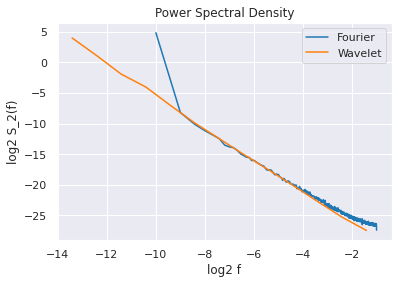

In [6]:
psd.plot_psd(X, fs, n_fft=1024)

The Wavelet-based estimation is done using wavelet analysis based on the Daubechies wavelet.

The number of vanishing moments can be controlled using the `n_moments` argument

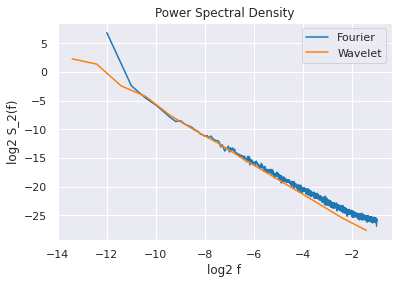

In [7]:
psd.plot_psd(X, fs, n_moments=3)

The wavelet-based estimation of the PSD is obtained via the `wavelet_estimation` function

In [8]:
PSD = psd.wavelet_estimation(X, fs, n_moments=3)

The output is an instance of the `PSD` namedtuple, with two fields: `freq` which contains the frequency support of the PSD estimation, and `psd` which contains the actual power estimates

In [9]:
PSD.freq, PSD.psd

(array([3.75000000e-01, 1.87500000e-01, 9.37500000e-02, 4.68750000e-02,
        2.34375000e-02, 1.17187500e-02, 5.85937500e-03, 2.92968750e-03,
        1.46484375e-03, 7.32421875e-04, 3.66210938e-04, 1.83105469e-04,
        9.15527344e-05]),
 array([4.73133234e-09, 2.18418160e-08, 1.32592068e-07, 7.64730284e-07,
        4.51892135e-06, 2.59221374e-05, 1.66729784e-04, 8.67050159e-04,
        5.20889179e-03, 5.18816922e-02, 1.85093262e-01, 2.57520450e+00,
        4.89619010e+00]))

## Wavelet Transform

Wavelet transform is performed in the package using the `wavelet` submodule

In [10]:
from pymultifracs.wavelet import wavelet_analysis

The wavelet analysis computes the wavelet coefficients and wavelet leaders (if specified) for a particular signal.

The output is a namedtuple with 3 fields:

* `wt_leaders`: The wavelet leaders if computed
* `wt_coefs`: Wavelet coefficients
* `j2_eff`: Maximum scale that the coefficients were effectively computed for

In [11]:
Y = mrw(shape=100, H=0.8, lam=np.sqrt(0.03), L=100)

In [12]:
WT = wavelet_analysis(Y)

/home/md262764/Multifracs/pymultifracs/pymultifracs/wavelet.py:110: UserWarning: Value of j2 is higher than the maximum allowed level. Max level and j2 set to 3
  warnings.warn("Value of j2 is higher than the maximum allowed level. "


The `j2` parameter controls the maximum scale at with the wavelet coefs and leaders will be computed

In [13]:
WT = wavelet_analysis(Y, j2=2)
WT.wt_coefs

MultiResolutionQuantity(formalism='wavelet coef', nj={1: 48, 2: 22, 3: 9}, values={1: array([-6.80453981e-03, -7.22019794e-03, -1.61402347e-03, -1.31660439e-02,
        2.18592012e-02,  4.44267203e-03,  2.93642720e-03, -3.50058461e-03,
       -7.79530037e-03, -1.58444195e-03,  6.00306673e-03,  3.62003568e-03,
       -3.77000785e-03, -8.98571362e-03,  2.04705545e-04, -6.48599041e-03,
        1.15982765e-02, -5.64994990e-04,  9.03512802e-03, -4.17059728e-03,
        1.30235009e-02,  7.60519909e-04, -1.31180617e-04, -1.55925765e-03,
       -3.90527307e-03,  3.12492328e-03, -1.50458227e-03,  1.99562291e-04,
        1.36251778e-03, -1.98603732e-03,  6.33107207e-04, -1.86735796e-03,
       -5.76190875e-03,  1.55859012e-03, -1.78895133e-04,  3.14838799e-03,
        1.92836781e-03,  9.17146983e-05,  7.01735684e-03, -2.19304747e-03,
       -8.40962343e-03, -1.73763620e-02,  1.30469262e-02, -9.49467178e-03,
        4.12141391e-03, -2.41170613e-02,  3.45299228e-03, -1.14884994e-03]), 2: array([-0

The `p_exp` parameter controls how wavelet leaders are computed: if set to an int, wavelet p-leaders will be computed, if set to `np.inf`, it will use the wavelet leaders. If it is left to None, only the wavelet coefs will be computed

In [14]:
WT = wavelet_analysis(Y, p_exp=None)
WT.wt_leaders

In [15]:
WT = wavelet_analysis(Y, p_exp=2)
WT.wt_leaders

MultiResolutionQuantity(formalism='wavelet p-leader', nj={1: 46, 2: 20, 3: 7}, values={1: array([0.0072202 , 0.01316604, 0.0218592 , 0.0218592 , 0.0218592 ,
       0.00444267, 0.0077953 , 0.0077953 , 0.0077953 , 0.00600307,
       0.00600307, 0.00898571, 0.00898571, 0.00898571, 0.01159828,
       0.01159828, 0.01159828, 0.00903513, 0.0130235 , 0.0130235 ,
       0.0130235 , 0.00155926, 0.00390527, 0.00390527, 0.00390527,
       0.00312492, 0.00150458, 0.00198604, 0.00198604, 0.00198604,
       0.00576191, 0.00576191, 0.00576191, 0.00314839, 0.00314839,
       0.00314839, 0.00701736, 0.00701736, 0.00840962, 0.01737636,
       0.01737636, 0.01737636, 0.01304693, 0.02411706, 0.02411706,
       0.02411706]), 2: array([0.02858943, 0.02858943, 0.01050642, 0.01129085, 0.01129085,
       0.01129085, 0.0095824 , 0.01075991, 0.01075991, 0.01075991,
       0.00641582, 0.00641582, 0.01096727, 0.01096727, 0.01096727,
       0.00486252, 0.00579768, 0.01598151, 0.01598151, 0.01992531]), 3: array([0.0

## Second order analysis

In [16]:
import pymultifracs.mfa as mfa
from pymultifracs.utils import build_q_log

Basic parameters are:

`j1` and `j2`, which indicate respectively the minimum and the maximum scale to consider when fitting wavelet coefficients

`q` The values of q for which the wavelet coefficients will be estimated

`n_cumul` The maximum order of the cumulants to compute

The p_exponent parameters `p_exp` controls how wavelet leaders are used: if set to an int, it will use wavelet p-leaders, or if set to `np.inf`, it will use the wavelet leaders.

The output of the `mf_analysis_full` function contains two variables, `dwt` and `lwt`. The former contains the multifractal variables computed using the wavelet coefs, while the latter uses the wavelet leaders.

By default the `p_exp` parameter is set to `None`, which means the wavelet coefs only are used, and so the `lwt` variable returned is set to `None`

In [17]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=2, j2=8,
    q=np.array([2]),
    n_cumul=2,
)

In [18]:
print(lwt)

None


**Unpacking dwt**

The variable dwt contains three fields: the structure functions, cumulants, multifractal spectrum, and hmin estimate. They can be unpacked all at once, or called one by one

In [19]:
sf = dwt.structure
hmin = dwt.hmin

**H estimate**

In [20]:
sf.H

0.7812171126281334

**structure functions**

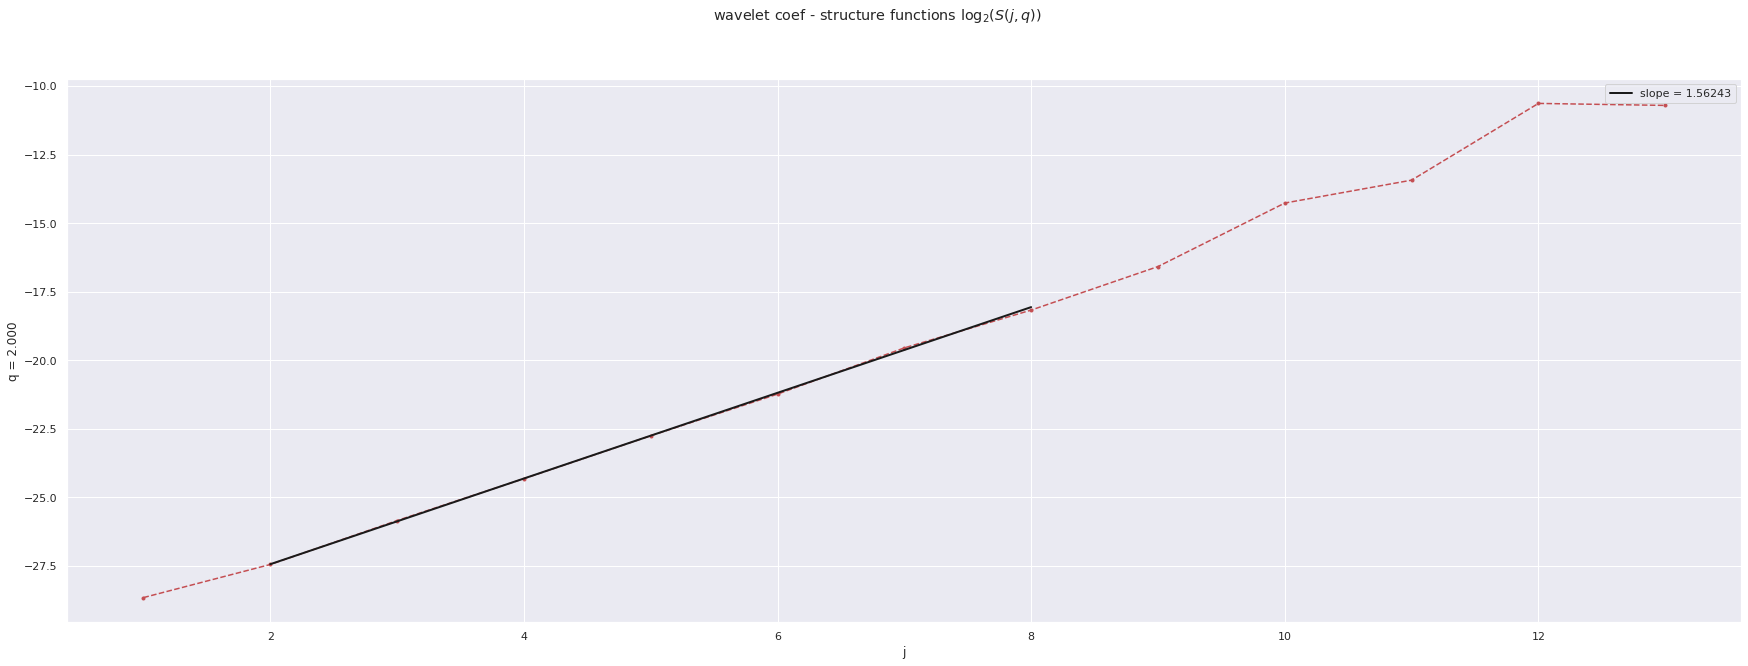

In [21]:
sf.plot(nrow=3)

## Multifractal Analysis

**Using wavelet leaders**

In [22]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=3, j2=16,
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.0
)

/home/md262764/Multifracs/pymultifracs/pymultifracs/wavelet.py:110: UserWarning: Value of j2 is higher than the maximum allowed level. Max level and j2 set to 13
  warnings.warn("Value of j2 is higher than the maximum allowed level. "


The `lwt` variable shares the same structure as `dwt`

In [23]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

The `lwt_sf`, `lwt_cumul`, `lwt_mfs` variables defined here share the same structure as the `sf`, `cumul`, and `mfs` variables defined previously

**structure functions**

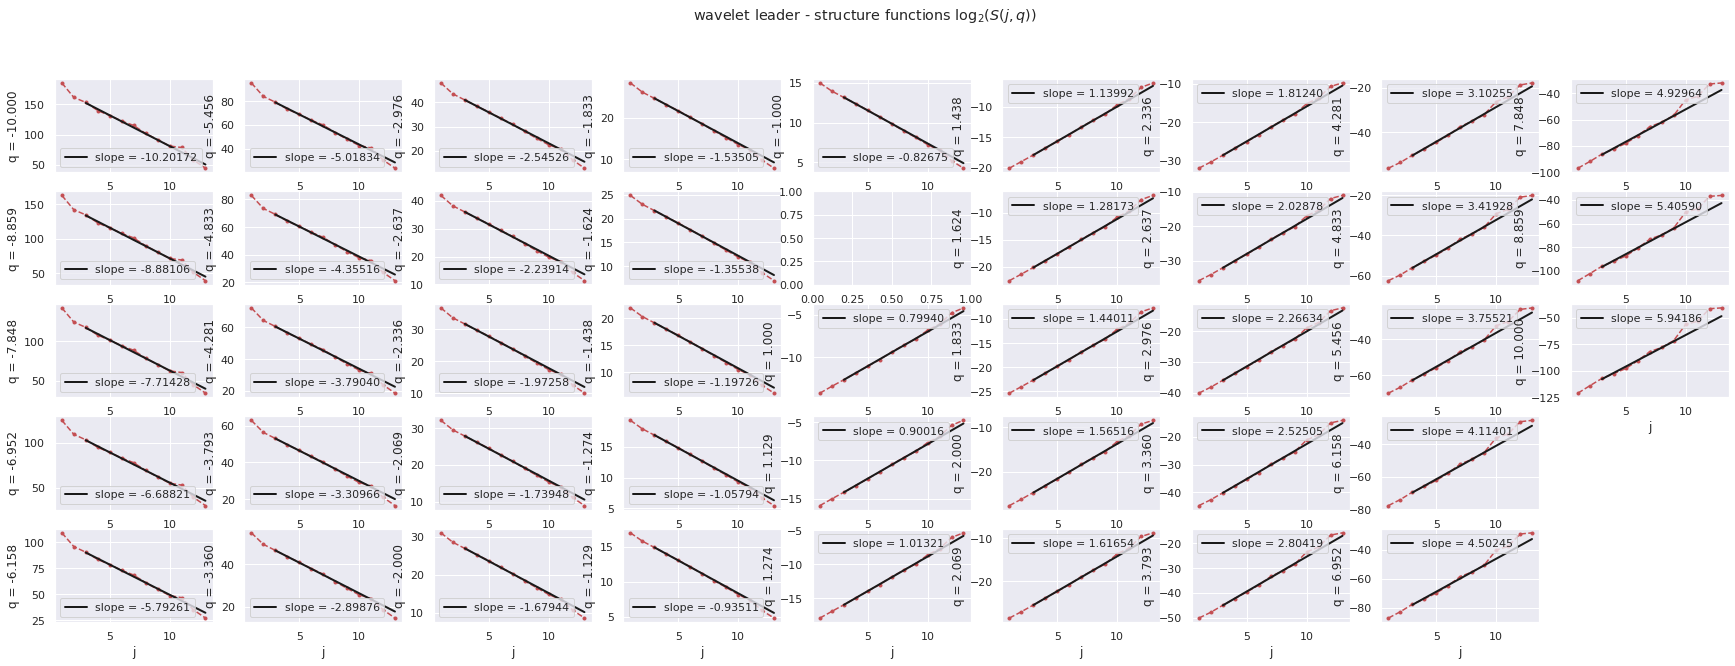

In [24]:
lwt_sf.plot(nrow=5)

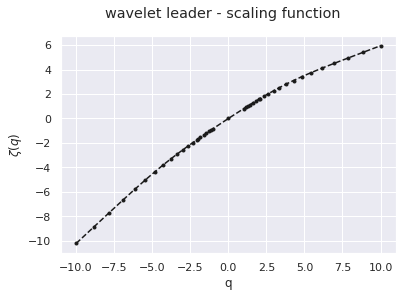

In [25]:
lwt_sf.plot_scaling()

**cumulants**

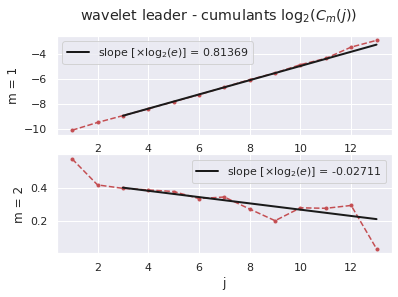

In [26]:
lwt_cumul.plot(nrow=3)

In [27]:
lwt_cumul.log_cumulants

array([ 0.81368575, -0.02711277])

**multifractal spectrum**

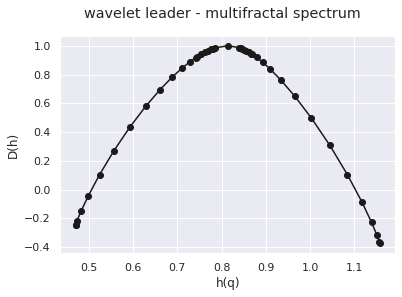

In [28]:
lwt_mfs.plot()

Overlaid with the theoretical spectrum

In [29]:
h = np.linspace(0, 1.5, 30)

c2 = -0.03
c1 = 0.8 - c2
D = 1 - (((h - c1) ** 2) / (2 * abs(c2)))

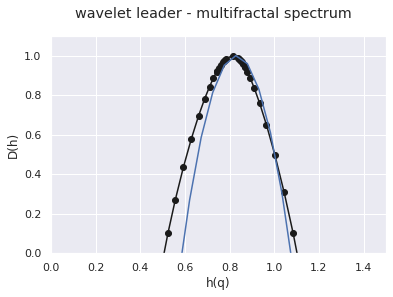

In [30]:
lwt_mfs.plot()

plt.ylim([0, 1.1])
plt.xlim([0, 1.5])
plt.plot(h, D)
plt.show()

**Using p-leaders**

In [31]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=3, j2=16,
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=2,
    gamint=0.0
)

/home/md262764/Multifracs/pymultifracs/pymultifracs/wavelet.py:110: UserWarning: Value of j2 is higher than the maximum allowed level. Max level and j2 set to 13
  warnings.warn("Value of j2 is higher than the maximum allowed level. "


The `lwt` variable shares the same structure as `dwt`

In [32]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

The `lwt_sf`, `lwt_cumul`, `lwt_mfs` variables defined here share the same structure as the `sf`, `cumul`, and `mfs` variables defined previously

**structure functions**

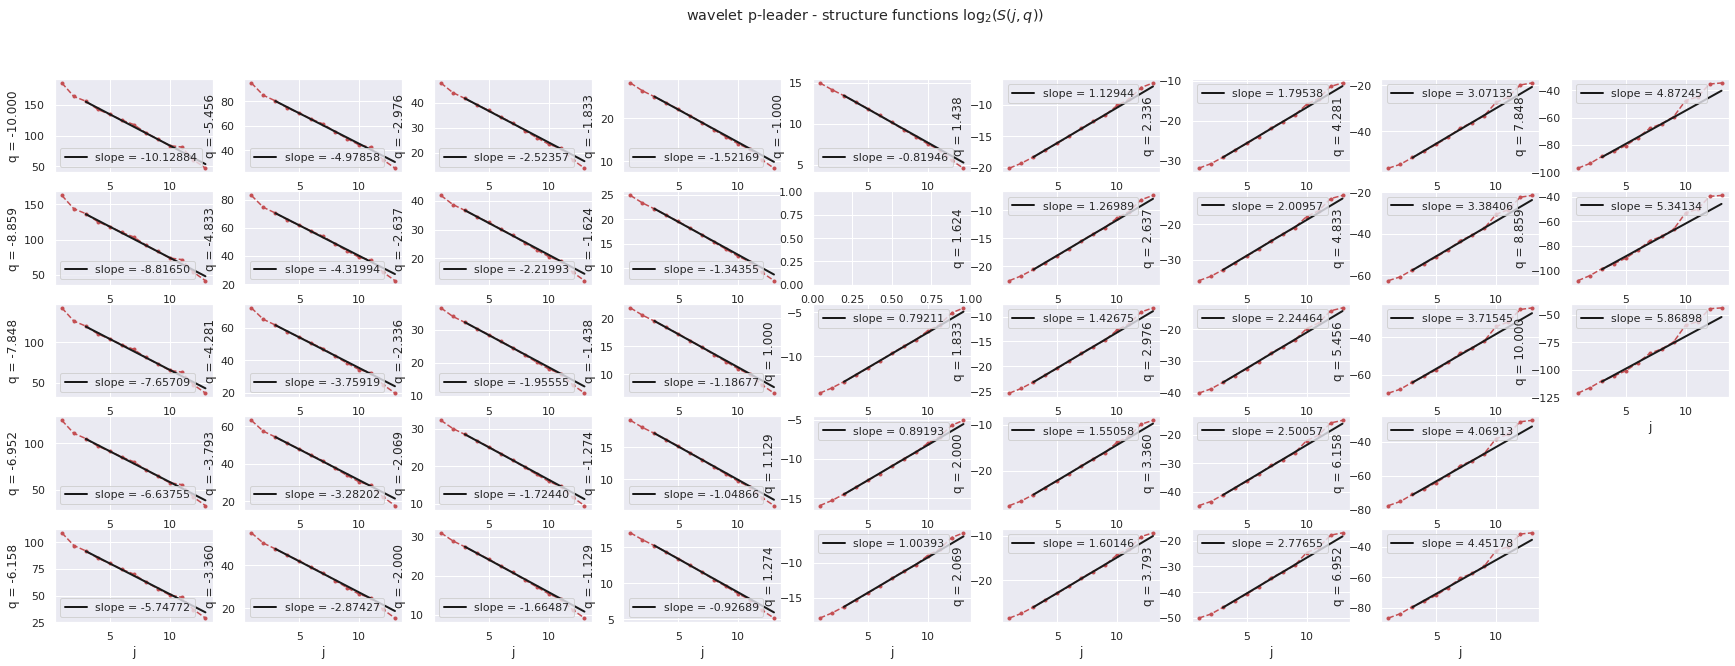

In [33]:
lwt_sf.plot(nrow=5)

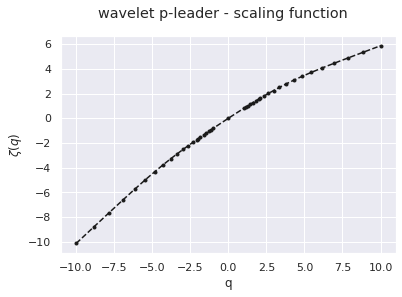

In [34]:
lwt_sf.plot_scaling()

**cumulants**

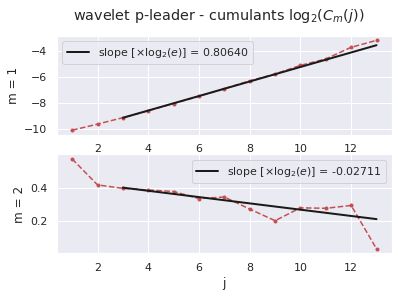

In [35]:
lwt_cumul.plot(nrow=3)

In [36]:
lwt_cumul.log_cumulants

array([ 0.80639776, -0.02711277])

**multifractal spectrum**

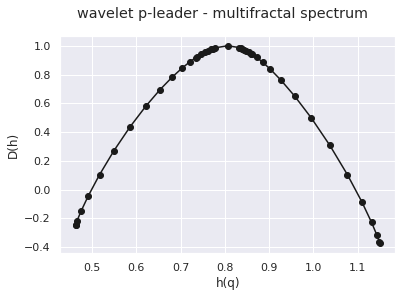

In [37]:
lwt_mfs.plot()

With theoretical spectrum

In [38]:
h = np.linspace(0, 1.5, 30)

c2 = -0.03
c1 = 0.8 - c2
D = 1 - (((h - c1) ** 2) / (2 * abs(c2)))

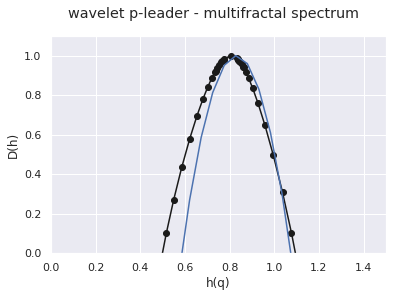

In [39]:
lwt_mfs.plot()

plt.ylim([0, 1.1])
plt.xlim([0, 1.5])
plt.plot(h, D)
plt.show()